In [1]:
pip install scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=7009dc5358004d536833bbbd5da2c4f615993b414ae3b285fab2bc8135ac201f
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
pip install paho-mqtt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for paho-mqtt: filename=paho_mqtt-1.6.1-py3-none-any.whl size=62120 sha256=bebd30afbc62724ae46fcbe25c94c55cf49947528655b3f0c5c143d33c4ba29a
  Stored in directory: /root/.cache/pip/wheels/8b/bb/0c/79444d1dee20324d442856979b5b519b48828b0bd3d05df84a
Successfully built paho-mqtt


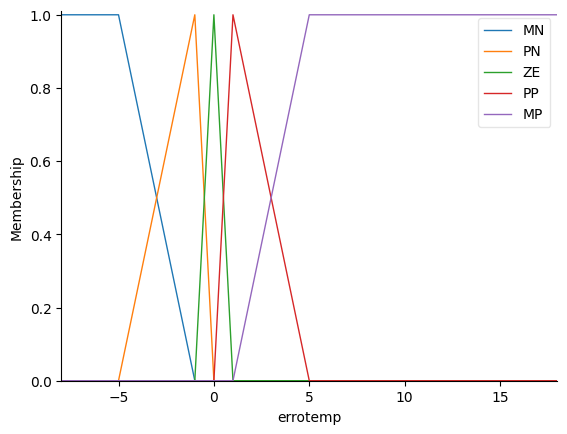

In [3]:
import numpy as np
import skfuzzy as fuzz
import paho.mqtt.client as mqtt
from skfuzzy import control as ctrl
import time

mqttBroker ="test.mosquitto.org"
client = mqtt.Client("c213Inatelsbm")
client.connect(mqttBroker)

# New Antecedent/Consequent objects hold universe variables and membership
# functions
errotemp = ctrl.Antecedent(np.arange(-8, 19, 1), 'errotemp')
varerrotemp =ctrl.Antecedent(np.arange(-1, 1, 0.01), 'varerrotemp')
resfriador =ctrl.Consequent(np.arange(0, 100, 1), 'resfriador')


# Custom membership functions can be built interactively with a familiar,
# Pythonic API
errotemp['MN'] = fuzz.trapmf(errotemp.universe, [-8, -8, -5,-1])
errotemp['PN'] = fuzz.trimf(errotemp.universe, [-5,-1,0])
errotemp['ZE'] = fuzz.trimf(errotemp.universe, [-1, 0, 1])
errotemp['PP'] = fuzz.trimf(errotemp.universe, [0, 1, 5])
errotemp['MP'] = fuzz.trapmf(errotemp.universe,[1, 5, 18,18])
# You can see how these look with .view()

errotemp.view()

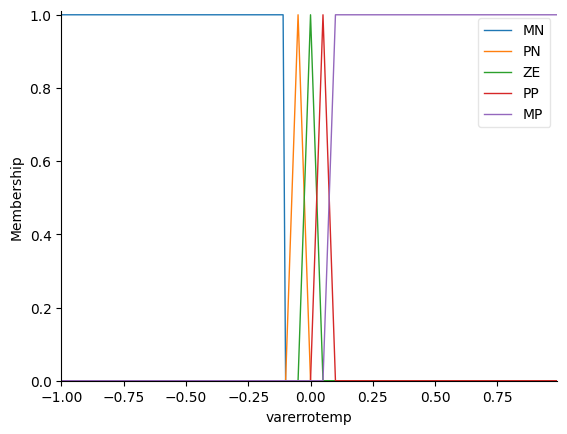

In [4]:
varerrotemp['MN'] = fuzz.trapmf(varerrotemp.universe, [-1, -1, -0.1,-0.1])
varerrotemp['PN'] = fuzz.trimf(varerrotemp.universe, [-0.1,-0.05,0])
varerrotemp['ZE'] = fuzz.trimf(varerrotemp.universe, [-0.05, 0, 0.05])
varerrotemp['PP'] = fuzz.trimf(varerrotemp.universe, [0, 0.05, 0.1])
varerrotemp['MP'] = fuzz.trapmf(varerrotemp.universe,[0.05, 0.1, 1,1])
# You can see how these look with .view()
varerrotemp.view()

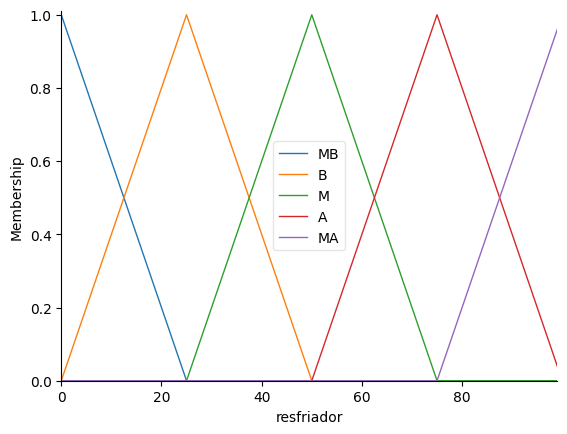

In [5]:
resfriador['MB'] = fuzz.trimf(resfriador.universe, [0,0,25])
resfriador['B'] = fuzz.trimf(resfriador.universe, [0,25,50])
resfriador['M'] = fuzz.trimf(resfriador.universe, [25, 50, 75])
resfriador['A'] = fuzz.trimf(resfriador.universe, [50, 75, 100])
resfriador['MA'] = fuzz.trimf(resfriador.universe, [75, 100, 100])
resfriador.view()

In [6]:
regra1 = ctrl.Rule(errotemp['MN']& varerrotemp['MN'], resfriador['MB'])
regra2 = ctrl.Rule(errotemp['PN']& varerrotemp['MN'], resfriador['MB'])
regra3 = ctrl.Rule(errotemp['ZE']& varerrotemp['MN'], resfriador['B'])
regra4 = ctrl.Rule(errotemp['PP']& varerrotemp['MN'], resfriador['M'])
regra5 = ctrl.Rule(errotemp['MP']& varerrotemp['MN'], resfriador['M'])
regra6 = ctrl.Rule(errotemp['MN']& varerrotemp['PN'], resfriador['MB'])
regra7 = ctrl.Rule(errotemp['PN']& varerrotemp['PN'], resfriador['B'])
regra8 = ctrl.Rule(errotemp['ZE']& varerrotemp['PN'], resfriador['B'])
regra9 = ctrl.Rule(errotemp['PP']& varerrotemp['PN'], resfriador['A'])
regra10 = ctrl.Rule(errotemp['MP']& varerrotemp['PN'], resfriador['A'])
regra11 = ctrl.Rule(errotemp['MN']& varerrotemp['ZE'], resfriador['MB'])
regra12 = ctrl.Rule(errotemp['PN']& varerrotemp['ZE'], resfriador['B'])
regra13 = ctrl.Rule(errotemp['ZE']& varerrotemp['ZE'], resfriador['M'])
regra14 = ctrl.Rule(errotemp['PP']& varerrotemp['ZE'], resfriador['A'])
regra15 = ctrl.Rule(errotemp['MP']& varerrotemp['ZE'], resfriador['MA'])
regra16 = ctrl.Rule(errotemp['MN']& varerrotemp['PP'], resfriador['B'])
regra17 = ctrl.Rule(errotemp['PN']& varerrotemp['PP'], resfriador['B'])
regra18 = ctrl.Rule(errotemp['ZE']& varerrotemp['PP'], resfriador['M'])
regra19 = ctrl.Rule(errotemp['PP']& varerrotemp['PP'], resfriador['A'])
regra20 = ctrl.Rule(errotemp['MP']& varerrotemp['PP'], resfriador['MA'])
regra21 = ctrl.Rule(errotemp['MN']& varerrotemp['MP'], resfriador['M'])
regra22 = ctrl.Rule(errotemp['PN']& varerrotemp['MP'], resfriador['M'])
regra23 = ctrl.Rule(errotemp['ZE']& varerrotemp['MP'], resfriador['A'])
regra24 = ctrl.Rule(errotemp['PP']& varerrotemp['MP'], resfriador['MA'])
regra25 = ctrl.Rule(errotemp['MP']& varerrotemp['MP'], resfriador['MA'])

In [7]:
aquecedor_ctrl = ctrl.ControlSystem([regra1, regra2, regra3,regra4,regra5,regra6, regra7, regra8,regra9,regra10,regra11, regra12, regra13,regra14,regra15,regra16, regra17, regra18,regra19,regra20,regra21, regra22, regra23,regra24,regra25])
potencia = ctrl.ControlSystemSimulation(aquecedor_ctrl)

In [10]:
sp=-6
tempatual=-4
print(tempatual)
erroatual=0
while True:
  erroanterior=erroatual
  erroatual=tempatual-sp
  varerroTemp=erroatual-erroanterior
  potencia.input['errotemp'] =erroatual
  potencia.input['varerrotemp'] =varerroTemp
  potencia.compute()
  i=0
  while (i < 10):
    tempatual=tempatual * 0.9952 - potencia.output['resfriador'] * 0.0003963
    time.sleep(0.1)
    i += 1
  print(tempatual)
  client.publish("Resfriador/Temperatura", tempatual)
  client.publish("Resfriador/erro", erroatual)

-4
-4.1638185191444705
-4.162141767532238
-4.25873648320624
-4.34898562916204
-4.435357565096635
-4.517726411353627
-4.596256347274865
-4.67111530072166
-4.74246933746414
-4.810479384947409
-4.875300165708763
-4.937079892923306
-4.995960274061962
-5.05207665025036
-5.087445859370982
-5.108788889668533
-5.119928065090056
-5.132301583765916
-5.1407639749005885
-5.148020176191968
-5.154006299977012
-5.163026008038114
-5.164393635881841
-5.187500003767069
-5.174909091667799
-5.201050800276654
-5.184443805214474
-5.2082469192599525
-5.190014219134459
-5.212505937830892
-5.194593376762054
-5.216540437875958
-5.198226784583396
-5.219523232513807
-5.201128135278571
-5.221986131343165
-5.203427851201974
-5.223901443444653
-5.205247951612994
-5.2254298958089125
-5.206684522478207
-5.226630388327703
-5.207816460361581
-5.227577848451563
-5.208707062339942
-5.228322283507406
-5.20940698810545
-5.2289074403457745
-5.209956572971024
-5.229366694401487
-5.2103878043930205
-5.229727018126636
-5.210725

KeyboardInterrupt: ignored

In [11]:
# Instale a biblioteca ipywidgets
!pip install ipywidgets

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import paho.mqtt.client as mqtt
import time
import ipywidgets as widgets
from IPython.display import display

# Inicialize o MQTT
mqttBroker = "test.mosquitto.org"
client = mqtt.Client("c213Inatelsbm")
client.connect(mqttBroker)

# Inicialize o sistema de controle fuzzy
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5,
                                       regra6, regra7, regra8, regra9, regra10,
                                       regra11, regra12, regra13, regra14, regra15,
                                       regra16, regra17, regra18, regra19, regra20,
                                       regra21, regra22, regra23, regra24, regra25])
potencia = ctrl.ControlSystemSimulation(sistema_controle)

class FuzzyControllerApp:
    def __init__(self):
        self.errotemp_widget = None
        self.tempatual_widget = None

    def get_user_inputs(self):
        sp = float(input('Insira o valor do SetPoint: '))
        tempatual = float(input('Insira o valor de Temperatura Atual (tempatual): '))
        return sp, tempatual

    def start_control(self):
        # Obtenha os valores de entrada do usuário uma vez
        sp, tempatual = self.get_user_inputs()
        erroatual = 0
        for _ in range(500):
            erro_anterior = erroatual
            erroatual = tempatual - sp
            varerroTemp = erroatual - erro_anterior

            # Atribua os valores de entrada ao sistema de controle fuzzy
            potencia.input['errotemp'] = erroatual
            potencia.input['varerrotemp'] = varerroTemp

            # Calcule o sistema fuzzy
            potencia.compute()
            print(tempatual)

            # Atualize a temperatura usando a saída do sistema de controle fuzzy
            tempatual = tempatual * 0.9952 - potencia.output['resfriador'] * 0.0003963
            time.sleep(0.1)


            # Publique os resultados no MQTT
            client.publish("Resfriador/Temperatura", tempatual)
            client.publish("Resfriador/erro", erroatual)

# Crie a aplicação
app = FuzzyControllerApp()
app.start_control()


Insira o valor do SetPoint: -6
Insira o valor de Temperatura Atual (tempatual): -4
-4.0
-4.016738821153846
-4.0273792010508185
-4.037952575273022
-4.0484699733677605
-4.058932349328034
-4.069340156241274
-4.079693687900782
-4.089993236222622
-4.1002390912648
-4.110431541246106
-4.120570872564583
-4.130657369815674
-4.140691315810024
-4.150672991590965
-4.160602676451688
-4.170480647952108
-4.180307181935437
-4.19008255254446
-4.199807032237533
-4.209480891804313
-4.219105162615046
-4.22868011953229
-4.238206020293584
-4.2476831237842
-4.257111733202046
-4.266492097146462
-4.275824462880222
-4.2851090763778075
-4.294346182332629
-4.303536024164172
-4.312678844025089
-4.3217748828082465
-4.330824380153723
-4.339827574455761
-4.348784702869668
-4.357696001318675
-4.366561704500748
-4.375382602240054
-4.3841591160393625
-4.3928914697897685
-4.401579886155842
-4.410224586664908
-4.418825791713199
-4.427383720571917
-4.435898591393268
-4.444370621216457
-4.452800025973645
-4.461187020495866
